# Demo: Usando la clase Servicio Web del paquete bccr

**Randall Romero Aguilar**

- Primera versión: 21 de diciembre de 2019
- Esta actualización: 25 de abril de 2021.

----------

Este cuaderno de Jupyter ilustra el uso de la clase `ServicioWeb` del paquete de Python `bccr`, la cual facilita la descarga de datos del servicio Web del Banco Central de Costa Rica. La documentación completa de esta clase está disponible en https://randall-romero.github.io/bccr/gee.html.

Se asume que el se tiene instalada la versión 2021.05.1 del paquete o una más reciente.

Este primer bloque instala el paquete si está corriendo este cuaderno de Jupyter en Google Colab.

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Este cuaderno está corriendo en Google Colab. Es necesario instalar el paquete bccr para obtener los datos")
    !pip install bccr
else:
    print("Este cuaderno está corriendo localmente.")

Este cuaderno está corriendo localmente.


### Pasos preliminares

Primero cargamos algunos paquetes: `pandas` para manipular los datos en Python, `numpy` para calcular un promedio (más adelante), `matplotlib` para hacer gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## 1. Iniciando una consulta

Se import desde `SW` desde `bccr`. Este es un objeto de la clase `ServicioWeb`.

In [2]:
from bccr import SW

## 2. Buscando una serie

Para importar una serie del servicio web, es necesario saber su código. Este código es el mismo que se ingresaría en el formulario disponible en la página del BCCR. Para facilitar encontrar las series, la clase `bccr.ServicioWeb` provee la función `buscar`. Acá, por ejemplo, buscamos la *frase* `'medio circulante'`:

In [3]:
SW.buscar(frase='medio circulante')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1445,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema bancario nacional [1445]'),Medio circulante,Colón Costarricense,Millones,Mensual
1479,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]'),Medio circulante,Colón Costarricense,Millones,Mensual
2936,Node('/BCCR/Sector Monetario y Financiero/Medio circulante sistema financiero nacional [1479]/Otros activos netos [2...,Otros activos netos,Colón Costarricense,Millones,Mensual


El resultado nos indica que los códigos 1445,1479 y 2936 corresponden a series que incluyen la *frase* **exacta** "medio circulante" en su descripción. Si no sabemos la frase exacta pero sí varias palabras que deben aparecer en la descripción (en cualquier orden), usamos `buscar` con la opción `todos`

In [4]:
SW.buscar(todos='numerario poder público') #puede omitir todos=

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1365,Node('/BCCR/Sector Monetario y Financiero/Numerario en poder del público [1365]'),ND,Colón Costarricense,Millones,Mensual
1489,Node('/BCCR/Sector Monetario y Financiero/Numerario en poder del sistema financiero [1489]'),Numerario en Poder del Público,Colón Costarricense,Millones,Mensual


También tenemos la opción de buscar series donde solo `algunos` de los términos aparecen en la descrición. Podemos además filtrar los resultados por la frecuencia de los datos (`A` anual, `6M` semestral, `Q` trimestral, `M` mensual, `W` semanal, y `D`diaria.

In [5]:
SW.buscar(algunos='japón yen', frecuencia='D')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
325,Node('/BCCR/Tipos de cambio/Yen Japonés [325]'),Yen japonés,Yen Japonés,NO DEFINIDO,Diaria
41454,Node('/BCCR/Tipos de cambio/Japón (yen) [41454]'),Japón (yen),Nivel,Unidades,Diaria


## 2. Descargando datos
### 2.1 Descargando una serie

Supongamos que queremos descargar datos del medio circulante (sistema bancario nacional). Arriba encontramos que su código es el 1445. Para ello ejecutamos `SW()` directamente (esto equivale a `SW.datos()`):

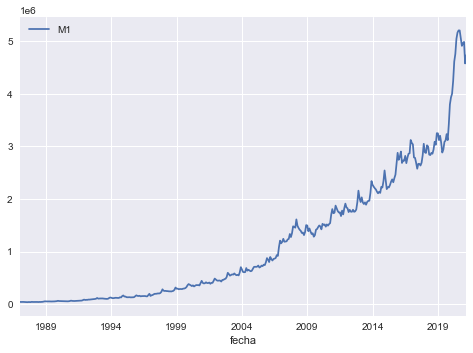

In [6]:
datos = SW(M1=1445)
datos.plot();

En la celda anterior, la parte `.rename(columns={'1445':'M1'})` es opcional, la utilizamos acá para cambiar el nombre de la serie. Observe que si bien podemos buscar la serie por código con un entero `1445` o un texto `'1445'`, el resultado siempre dará el *nombre* de la variable como texto; por ello para renombrarla con `.rename()` es necesario usar un texto.

### 2.2 Descargando dos series de la misma frecuencia
Es posible además pasarle varios códigos a `datos` de una vez, ya sea en una lista `[1365,1445]` o tupla `(1365, 1445)` o bien las llaves de un diccionario (como se ilustra en la siguiente celda). Acá descargamos, además del medio circulante, en numerario en poder del público. El resultado será una tabla `pandas.DataFrame`, donde cada columna corresponde a una variable.

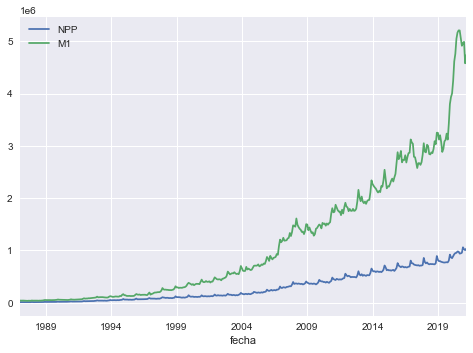

In [7]:
dinero = SW(NPP=1365, M1=1445)
dinero.plot();

### 2.3 Descargando varias series de distinta frecuencia

La función `datos` permite descargar variables de distinta frecuencia, convirtiéndolos a una frecuencia común. Por ejemplo, suponga que desea, además de los datos anteriores, la serie de la tasa básica pasiva:

In [8]:
SW.buscar(frase='tasa básica pasiva calculada')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
423,Node('/BCCR/Tasas de interés/Tasa básica pasiva calculada por el BCCR [423]'),Tasa Básica pasiva bruta calculada por el Banco Central.,Porcentaje,NO DEFINIDO,Diaria
430,Node('/BCCR/Tasas de interés/Tasa básica pasiva calculada por el BCCR [430]'),Tasa basica pasiva bruta a fin de cada mes calculada por el Banco Central de Costa Rica.,Porcentaje,NO DEFINIDO,Mensual
19654,Node('/BCCR/Tasas de interés/Tasa básica pasiva calculada por el BCCR [19654]'),Tasa Básica pasiva bruta calculada por el Banco Central.,Porcentaje,NO DEFINIDO,Nueva semanal


Vemos que el código 423 es de una serie diaria, mientras que los datos de `M1`y `NPP` eran mensuales. En la siguiente celda, le indicamos a `datos` que debe convertir los datos de mayor a menor frecuencia usando un promedio (`func=np.mean`). Es posible además restringir el rango de los datos con los parámetros `FechaInicio=` y `FechaFinal=`.

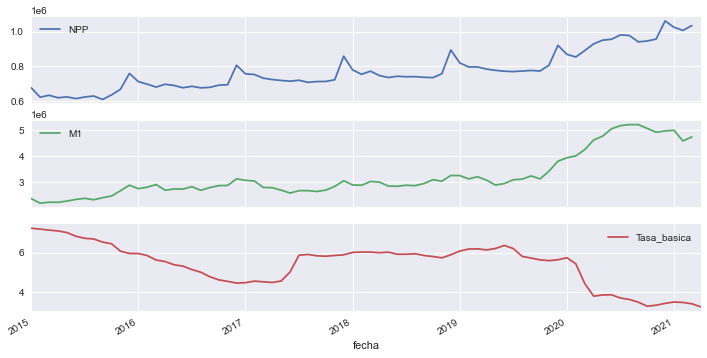

In [9]:
datos = SW(NPP=1365, M1=1445, Tasa_basica=423, FechaInicio=2015, func='mean')
datos.plot(subplots=True, figsize=[12,6]);

In [10]:
datos.tail()

,NPP,M1,Tasa_basica
fecha,,,
2020-12,1.060905e+06,4.964104e+06,3.437097
2021-01,1.024351e+06,4.988481e+06,3.506452
2021-02,1.006321e+06,4.578601e+06,3.485714
2021-03,1.034342e+06,4.733563e+06,3.416129
2021-04,NaN,NaN,3.263462


La frecuencia de los datos puede controlarse con el parámetro `freq=`. Si no se indica, se obtienen los datos de menor frecuencia. Es posible además indicar distintos métodos de conversión para `func=`, pasando un diccionario de la forma `{nombre1: función1, nombre2: función2, ,...}`.

## 3. Buscar información
### 3.1 Buscar información de una variable

Suponga que deseamos una variable que muestre todos estos términos

In [11]:
SW.buscar('exportaciones importaciones encadenado original')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
33471,"Node('/BCCR/Sector Real/PIB y gasto, volumen encadenado, serie original [33438]/IMPORTACIONES DE BIENES Y SERVICIOS ...",EXPORTACIONES DE BIENES Y SERVICIOS (P6),Colón Costarricense Constantes,Millones,Trimestral
33472,"Node('/BCCR/Sector Real/PIB y gasto, volumen encadenado, serie original [33439]/IMPORTACIONES DE BIENES Y SERVICIOS ...",EXPORTACIONES DE BIENES Y SERVICIOS (P6),Porcentaje Variación Interanual,Millones,Trimestral


El resultado obtenido nos deja una duda, porque en `DESCRIPCION` indica que se trata de importaciones  pero en `descripcion` menciona exportaciones.  Para obtener más información de `quien` es una variable:

In [12]:
SW.quien(33472)

Variable 33472 >>>
   Nombre      : IMPORTACIONES DE BIENES Y SERVICIOS (P7).
   Descripcion : EXPORTACIONES DE BIENES Y SERVICIOS (P6).
   Unidad      : Porcentaje Variación Interanual (Millones).
   Periodicidad: Trimestral.

|--- Sector Real
|------ PIB y gasto, volumen encadenado, serie original [33439]
|--------- IMPORTACIONES DE BIENES Y SERVICIOS (P7) [33472]'




Lo anterior nos indica que la variable 33472 está ligada a la 33439. Para ver todas las sub-variables de 33439, usamos la función `subcuentas`:

In [13]:
SW.subcuentas(33439);

PIB y gasto, volumen encadenado, serie original [33439]
├── DEMANDA INTERNA [33442]
│   ├── Gasto de consumo final (P3/P4) [33445]
│   │   ├── Gasto de consumo final de los hogares e ISFLSH [33448]
│   │   └── Gasto de consumo final del Gobierno General [33451]
│   └── Formación bruta de capital fijo [33454]
│       └── Formación bruta de capital fijo (P51g) [33457]
├── EXPORTACIONES DE BIENES Y SERVICIOS (P6) [33463]
│   ├── Exportaciones de bienes f.o.b. (P61) [33466]
│   └── Exportaciones de servicios (P62) [33469]
└── IMPORTACIONES DE BIENES Y SERVICIOS (P7) [33472]
    ├── Importaciones de bienes f.o.b. (P71) [33475]
    └── Importaciones de servicios (P72) [33478]


Lo anterior nos permite deducir que en realidad 33472 se trata de datos de importaciones.

### 3.2 Buscar series relacionadas
El ejemplo anterior ilustró el uso de `subcuentas` para encontrar series relacionadas. 

In [14]:
SW.buscar('Producto Interno Bruto volumen encadenado original', frecuencia='Q')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
33438,"Node('/BCCR/Sector Real/PIB y gasto, volumen encadenado, serie original [33438]')",Producto interno bruto a precios de mercado,Colón Costarricense Constantes,Millones,Trimestral
33439,"Node('/BCCR/Sector Real/PIB y gasto, volumen encadenado, serie original [33439]')",Producto interno bruto a precios de mercado,Porcentaje Variación Interanual,Millones,Trimestral


En este caso concreto, nos interesa conocer componentes del PIb en colones (en vez de su variación interanual). Las `subcuentas` de 33438 nos ayuda a encontrar los códigos relevantes, a partir de lo cual podemos hacer un diccionario de las variables de interés: 

In [15]:
SW.quien(33438)

Variable 33438 >>>
   Nombre      : PIB y gasto, volumen encadenado, serie original.
   Descripcion : Producto interno bruto a precios de mercado.
   Unidad      : Colón Costarricense Constantes (Millones).
   Periodicidad: Trimestral.

|--- Sector Real
|------ PIB y gasto, volumen encadenado, serie original [33438]'




In [16]:
ctas = SW.subcuentas(33438)

PIB y gasto, volumen encadenado, serie original [33438]
├── DEMANDA INTERNA [33441]
│   ├── Gasto de consumo final (P3/P4) [33444]
│   │   ├── Gasto de consumo final de los hogares e ISFLSH [33447]
│   │   └── Gasto de consumo final del Gobierno General [33450]
│   └── Formación bruta de capital fijo [33453]
│       └── Formación bruta de capital fijo (P51g) [33456]
├── EXPORTACIONES DE BIENES Y SERVICIOS (P6) [33462]
│   ├── Exportaciones de bienes f.o.b. (P61) [33465]
│   └── Exportaciones de servicios (P62) [33468]
└── IMPORTACIONES DE BIENES Y SERVICIOS (P7) [33471]
    ├── Importaciones de bienes f.o.b. (P71) [33474]
    └── Importaciones de servicios (P72) [33477]


In [17]:
series = {
    'PIB': 33438,
    'Demanda Interna': 33441,
    'Gasto': 33444,
    'C': 33447,
    'G': 33450,
    'FBKF': 33453,
    'I': 33456,
    'X': 33462,
    'Xb' : 33465,
    'Xs' : 33468,
    'M': 33471,
    'Mb': 33474,
    'Ms': 33477,
}

In [18]:
cuentas_nacionales = SW(**series)


No se obtuvieron datos de indicador 33441. Servidor respondio con mensaje OK
Revise que este indicador efectivamente existe, o intente de nuevo la obtención de los datos.

No se obtuvieron datos de indicador 33444. Servidor respondio con mensaje OK
Revise que este indicador efectivamente existe, o intente de nuevo la obtención de los datos.

No se obtuvieron datos de indicador 33453. Servidor respondio con mensaje OK
Revise que este indicador efectivamente existe, o intente de nuevo la obtención de los datos.

No se obtuvieron datos de indicador 33462. Servidor respondio con mensaje OK
Revise que este indicador efectivamente existe, o intente de nuevo la obtención de los datos.

No se obtuvieron datos de indicador 33471. Servidor respondio con mensaje OK
Revise que este indicador efectivamente existe, o intente de nuevo la obtención de los datos.


Al parecer, el servicio web no proporciona directamente los datos para las variables sub-totales. Los demás datos los graficamos a continuación:

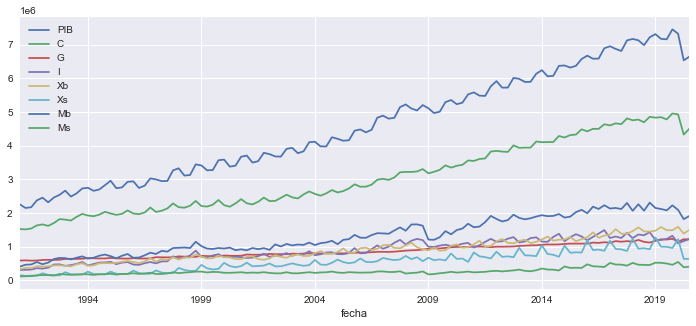

In [19]:
cuentas_nacionales.plot(figsize=[12,5]);

## 4. Exportando datos

Finalmente, podemos exportar los datos de `pandas` a otros formatos; aquí se muestran los comandos para obtener archivos CSV (`to_csv`), Excel (`to_excel`) y Latex (`to_latex`):

In [20]:
cuentas_nacionales.to_csv('cuentas.csv')
cuentas_nacionales.to_excel('cuentas.xlsx')
cuentas_nacionales.to_latex('cuentas.tex')

También podemos exportarlos a Stata (`to_stata`), aunque primero es necesario hacer un par de ajustes (indexar los datos por fechas en vez de períodos y quitar espacios y usar solo caracteres ASCII en los nombres de las columnas)

In [21]:
cuentas_nacionales.index = cuentas_nacionales.index.to_timestamp()
cuentas_nacionales.to_stata('cuentas.dta')

## Advertencia

Este paquete ha sido desarrollado por Randall Romero Aguilar, y se ha compartido para facilitar la obtención de datos del BCCR a quien así lo necesite.
**NO** es un paquete oficial del Banco Central de Costa Rica, ni cuenta con aprobación o patrocinio del BCCR.

**El paquete se ofrece gratuitamente pero SIN NINGUNA GARANTIA acerca de su correcto funcionamiento.**Aunque he puesto el mayor esfuerzo en que este paquete funcione correctamente, algunos errores pueden persistir.  Si encuentra alguno, o bien si tiene sugerencias acerca de futuras mejoras, por favor envíeme un correo a randall.romero@outlook.com.

&#169; Randall Romero Aguilar, 2015-2021